# Linear Regression Example for SimpleAutodiff

## Content 
1. Generate a dataset 
2. Define our model + loss
3. Train our model
4. Visualize the result


In [1]:
%matplotlib inline

We use This so that we can access the file from above file

In [2]:
import sys
sys.path.append("..")

We are going to import all the classes we want to use.

In [3]:
from AutoDiff.scalarCalculation.values import variable, constant
from AutoDiff.scalarCalculation.operators import Arithmetic, sigmoid, square
from AutoDiff.scalarCalculation.visualize import visualize

Import random to add the noise to the generated data. 

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Generate a dataset

Define the x numpy array

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

Create a linear function, given a number x, return a $3x + 4$

In [6]:
def linearFunction(x):
    return x*3 + 4

Loop through the number between negative ten to ten with 0.1 interval and store it in the list.

In [7]:
y = linearFunction(x) + np.random.randn(100) * 0.5

Draw a data points

[0, 6, 0, 20]

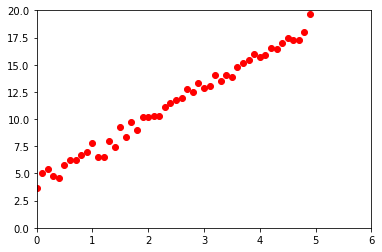

In [8]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

### Define the model + loss

#### The model

Define a slope and y-intersection

In [9]:
w = variable.Variables(random.random(), name="w")
b = variable.Variables(random.random(), name="b")
print(w.value)
print(b.value)

0.6557899138538086
0.6089606391545948


Define the first point's x-axis and y-axis

In [10]:
x_var = constant.Constant(x[0].item())
y_var = constant.Constant(y[0].item(), name="y_var")
num_point_inverse = constant.Constant(1/100)

#### The model loss

In [11]:
prediction = Arithmetic.Add(Arithmetic.Multiply(x_var, w), b)
loss = square.Square(Arithmetic.Minus(y_var , prediction))
print("x_var is", x_var.value)
print("y_var is", y_var.value)
print("The loss is", loss.forward())
print("The prediction is", prediction.forward())

x_var is -5.0
y_var is -10.770614949417354
The loss is 65.62014190460725
The prediction is -2.669988930114448


#### Define a training loop 

In [12]:
loss.backward(1)
print("w grad is", w.get_grad())
print("b grad is ", b.get_grad())

w grad is -81.00626019302906
b grad is  16.201252038605812


#### Define the list that contains the loss
so that we can see how the loss decreases

In [13]:
loss_array = []

The loop

In [14]:
for a in range(15):
    for i in range(0, 100):
        # We sample the point
        random_num = np.random.randint(0, 100)
        x_var = constant.Constant(x[random_num].item(), name="x_var")
        y_var = constant.Constant(y[random_num].item(), name="y_var")
        
        # Do the prediction
        prediction = Arithmetic.Add(Arithmetic.Multiply(x_var, w), b)
        
        # Calculate the loss
        loss = square.Square(Arithmetic.Minus(y_var , prediction))
        print("The Loss is", loss.forward())
        
        # Every 10 iterations 
        if i % 10 == 0:
            loss_array.append(loss.forward())
        loss.backward(1)
        
        # Update the loss
        w.value = w.value - 0.001 * w.get_grad()
        b.value = b.value - 0.001 * b.get_grad()

The Loss is 183.4665906922804
The Loss is 75.0167314736667
The Loss is 148.39014132555835
The Loss is 152.86530161415268
The Loss is 12.746619672731724
The Loss is 21.58612835933262
The Loss is 5.677095200423146
The Loss is 9.069010767177145
The Loss is 131.71731659908534
The Loss is 0.6035237866408851
The Loss is 0.35319662922034817
The Loss is 0.17343428470300115
The Loss is 78.86264070425563
The Loss is 46.48136629814083
The Loss is 6.649193235993673
The Loss is 1.2071929128683303
The Loss is 94.49745556392674
The Loss is 81.71807387241057
The Loss is 68.52821112284187
The Loss is 20.362218394121594
The Loss is 82.43105324189787
The Loss is 2.4803098585850205
The Loss is 120.57914701936494
The Loss is 47.24375698474052
The Loss is 63.00838301954714
The Loss is 17.978537809716293
The Loss is 42.5800598356139
The Loss is 51.79765977833654
The Loss is 0.07668316340869108
The Loss is 12.179167204876615
The Loss is 0.03155191042817935
The Loss is 30.191841732060503
The Loss is 7.65352201

The Loss is 4.2371675260457256
The Loss is 2.001457550081586
The Loss is 1.6012755511585506
The Loss is 2.603104691593661
The Loss is 3.959674811708149
The Loss is 4.70766305484563
The Loss is 3.548741956812076
The Loss is 2.0151220430612935
The Loss is 2.085087702471242
The Loss is 6.441198057478918
The Loss is 3.7772742465836466
The Loss is 3.9913835966381015
The Loss is 3.9021436822140894
The Loss is 9.441132977190879
The Loss is 1.4448314230228751
The Loss is 3.263839754050798
The Loss is 2.5884210309149136
The Loss is 1.7426681266510589
The Loss is 2.5629058361061885
The Loss is 2.3787898801186644
The Loss is 3.9199120182996
The Loss is 5.1808235277121675
The Loss is 4.9769917748110055
The Loss is 2.9316779896587453
The Loss is 4.159834258382177
The Loss is 2.7231928571026005
The Loss is 4.362153374394684
The Loss is 2.119146788488122
The Loss is 1.7029131447079715
The Loss is 3.6961193839525084
The Loss is 4.1615509207586285
The Loss is 5.939308195331555
The Loss is 1.48041745495

The Loss is 0.009119526152872565
The Loss is 0.01924835928076512
The Loss is 0.12628273656103206
The Loss is 0.14193308057704063
The Loss is 0.13818913721223605
The Loss is 0.13439713947583795
The Loss is 0.801127520290433
The Loss is 0.7771902115773722
The Loss is 0.35261264995473257
The Loss is 1.4338229644253264
The Loss is 0.03440315853257253
The Loss is 1.398130281094384
The Loss is 0.06659251602358439
The Loss is 0.23185830057012558
The Loss is 0.14987235598052498
The Loss is 1.1181926789641936
The Loss is 0.08553626588297877
The Loss is 0.005232460564392257
The Loss is 0.23087918497084345
The Loss is 0.005520149166670653
The Loss is 0.2778018148380275
The Loss is 1.4521868085340937
The Loss is 1.100906902545205
The Loss is 0.7803570048468714
The Loss is 0.048192686392577073
The Loss is 0.19279941335057274
The Loss is 0.5807955609407817
The Loss is 0.053963286115387685
The Loss is 0.09156584726630788
The Loss is 1.543681783576095e-05
The Loss is 0.7297238172513163
The Loss is 0.0

## Visualize the result

#### Plot the loss.

Text(0,0.5,'Loss')

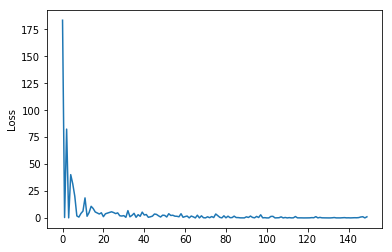

In [15]:
plt.plot(loss_array)
plt.ylabel('Loss')

#### Plot the result

As you can see the w value and b value is similar to the defined model

In [16]:
print("w value is", w.value)
print("b value is", b.value)

w value is 2.9917694446137935
b value is 3.8630890180865025


Let's see how the w value and b value graph turn out!!!

[0, 6, 0, 20]

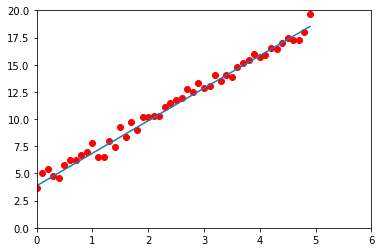

In [17]:
plt.plot(x, y, 'ro')
plt.plot(x, x*w.value + b.value)
plt.axis([0, 6, 0, 20])

We made it using simpleAutoDiff

Looking at the computational graph

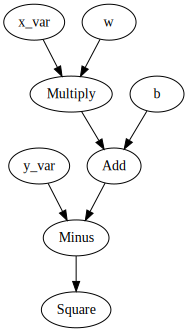

In [18]:
visualize.plot_graph(loss, mode="d")

And we are done !!!